- 1. Prepare dataset

In [13]:

import numpy as np 
from sklearn.datasets import make_regression
import torch 
from torch import nn
from torch import optim
import sklearn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt


In [7]:
x,y, coef = make_regression(n_samples=100,
                            n_features=1,
                            noise=10,
                            coef=True,
                            bias=1.5,
                            random_state=0
                        )
x = torch.tensor(x)
y = torch.tensor(y)
dataset = TensorDataset(x,y)
#Combines a dataset and a sampler, and provides an iterable over s
# the given dataset.
dataloader = DataLoader(dataset= dataset, batch_size=2, shuffle=True)   #drop_last = True (no need bagtslaagui data )  #shuffle - make mess

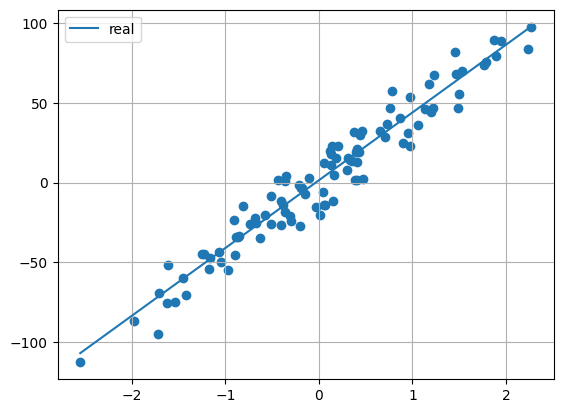

In [14]:

# 绘制数据的真实的线性回归结果
plt.scatter(x, y)
x = torch.linspace(x.min(), x.max(), 1000) 
y1 = torch.tensor([v * coef + 1.5 for v in x]) 
plt.plot(x, y1, label='real') 
plt.grid() 
plt.legend() 
plt.show()

- 2. Design model

In [9]:
model = torch.nn.Linear(in_features=1, out_features=1)  #输入维度

- 3. Optimize / Construct Loss

In [18]:
#损失：均方误差
criterion = nn.MSELoss()
#优化器
optimizer = optim.SGD(params=model.parameters(), lr=0.001)

- 4. Training cycle 

In [15]:
#遍历每个epoch
loss_num =[]
for i in range(100):
    sum = 0 
    sample = 0
    for x_, y_ in dataloader:
        #模型预测
        y_predict = model(x_.type(torch.float32))
        #损失计算
        loss = criterion(y_predict, y_.reshape(-1,1).type(torch.float32))    # (n,1 ) 
        sum += loss.item()
        sample += len(y_)
        #梯度清零
        optimizer.zero_grad()
        #自动微分
        loss.backward()
        #更新参数
        optimizer.step()
    loss_num.append(sum /sample)

    

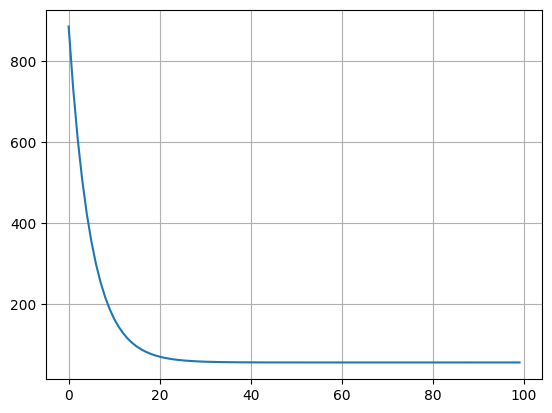

ValueError: x and y must be the same size

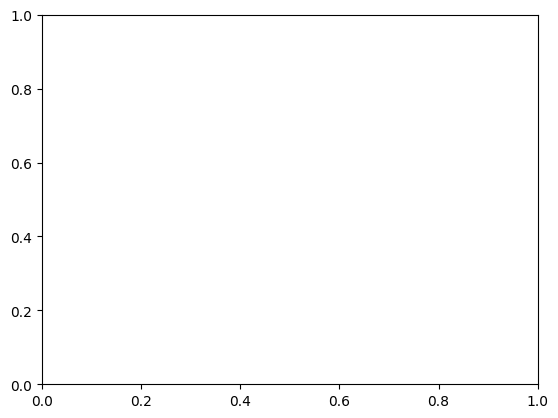

In [17]:
plt.plot(range(100), loss_num) 
# plt.title('损失变化曲线’)
plt.grid() 
plt.show()
# 绘制拟合直线
plt.scatter(x, y)
x = torch.linspace(x.min(), x.max(), 1000)
y1 = torch.tensor([v * model.weight + model.bias for v in x])
y2 = torch.tensor([v * coef + 1.5 for v in x])
plt.plot(x, y1, label='train')
plt.plot(x, y2, label='real')
plt.grid()
plt.legend()
plt.show()